In [149]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import LinearNDInterpolator
from scipy.ndimage import gaussian_filter

In [150]:
def shear_statistics(case):
    data = np.loadtxt('NonNewtonian/cavityNonNewtonian_'+case+'_0.csv',delimiter = ',')
    u_data = data[:,1] 
    v_data = data[:,2]
    X = data[:,4]
    Z = data[:,5]

    dx = 0.02
    xx,zz = np.meshgrid(np.arange(0,1.0+dx,dx),np.arange(0,1.0+dx,dx))
    u_interp = LinearNDInterpolator(list(zip(X,Z)), u_data)
    v_interp = LinearNDInterpolator(list(zip(X,Z)), v_data)

    u1 = u_interp(xx,zz)
    v1 = v_interp(xx,zz)

    abs_grad = np.abs((u1[1:-1,2:] - u1[1:-1,0:-2])/(2*dx))**2 + np.abs((u1[2:,1:-1] - u1[0:-2,1:-1])/(2*dx))**2
    abs_grad += np.abs((v1[1:-1,2:] - v1[1:-1,0:-2])/(2*dx))**2 + np.abs((v1[2:,1:-1] - v1[0:-2,1:-1])/(2*dx))**2
    abs_grad = np.sqrt(abs_grad.flatten())
    return abs_grad

    

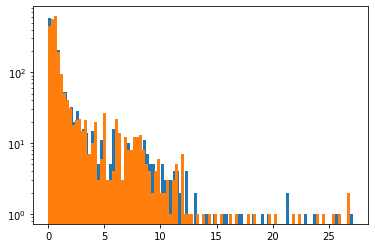

In [151]:
case0 = 'n0_5_k0_1'
abs_grad0 = shear_statistics(case0)
case1 = 'n0_5_k1'
abs_grad1 = shear_statistics(case1)

data0 = plt.hist(abs_grad0,bins=100)
data1 = plt.hist(abs_grad1,bins=100)
plt.yscale('log')

26.860418286311642


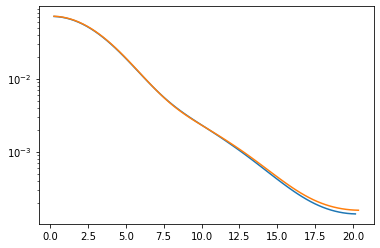

In [152]:
cutoff = 75
sigma = 10
plt.plot(data1[1][1:cutoff+1],gaussian_filter(data1[0][0:cutoff],sigma=sigma)/np.trapz(gaussian_filter(data1[0][0:cutoff],sigma=sigma))    )
plt.plot(data0[1][1:cutoff+1],gaussian_filter(data0[0][0:cutoff],sigma=sigma)/np.trapz(gaussian_filter(data1[0][0:cutoff],sigma=sigma))    )
plt.yscale('log')
print(np.max(abs_grad1))